<a href="https://colab.research.google.com/github/Inamul-Hassan/Analysis-Of-911-Calls/blob/main/Analysis_of_911_Calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Of 911 Calls


### Importing Necessary Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [35]:
plt.style.use('dark_background')

In [33]:
sns.set(style = 'darkgrid')

### Reading Data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Resume Projects/Datasets/911.csv')

In [5]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


### DateTime

In [7]:
type(data['timeStamp'].iloc[0])

str

From the initial observation, we can say that our data has date and time, but it is in string. 

So we will change it into DateTime format and make new columns from it.


In [8]:
# Using pandas to_datetime to change its dtype from string to datetime

data['timeStamp']=pd.to_datetime(data['timeStamp'])

In [9]:
data['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [10]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Now it is in dateTime format, thus we can use various methods and attributes of dateTime class to access various information from it.

In [11]:
time = data["timeStamp"].iloc[0]

In [12]:
time.hour

17

In [13]:
time.day_name()

'Thursday'

#### Creating new columns

In [14]:
# Splitting Hour

data['hour'] = data['timeStamp'].dt.hour

In [15]:
# Splitting Month

data['month'] = data['timeStamp'].dt.month

In [16]:
# Splitting day of the week
#day_name() is a function of pandas date time

data['dayOfWeek'] = data['timeStamp'].dt.day_name()


In [17]:
# Splitting Hour


data['year'] = data['timeStamp'].dt.year

In [18]:
# Splitting date

data['date'] = data['timeStamp'].dt.date

We have sucessfully created new columns using dateTime

In [19]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,month,dayOfWeek,year,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thursday,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thursday,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,12,Thursday,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,12,Thursday,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,12,Thursday,2015,2015-12-10


### Column 'e'

The column 'e' contains only one value('1') and it is of no use, so we will drop that column.

In [20]:
data.drop('e',inplace=True,axis=1)

In [21]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,hour,month,dayOfWeek,year,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,17,12,Thursday,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,12,Thursday,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,14,12,Thursday,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,16,12,Thursday,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,16,12,Thursday,2015,2015-12-10


### Seperating category of reason from 'title'

The column 'title' contains the category of the emergency and the reason for the emergency. we will try to split it into two different column.

In [22]:
data['reasonCategory'] = data['title'].apply(lambda x: x.split(':')[0])
data['reason'] = data['title'].apply(lambda x: x.split(':')[1].lstrip())

In [23]:
# Droping the title column

data.drop('title',axis=1,inplace=True)

In [24]:
data.head()

,lat,lng,desc,zip,timeStamp,twp,addr,hour,month,dayOfWeek,year,date,reasonCategory,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,17,12,Thursday,2015,2015-12-10,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,12,Thursday,2015,2015-12-10,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,14,12,Thursday,2015,2015-12-10,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,16,12,Thursday,2015,2015-12-10,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,16,12,Thursday,2015,2015-12-10,EMS,DIZZINESS


In [25]:
data['reasonCategory'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [26]:
data['reason'].value_counts()

VEHICLE ACCIDENT -           148372
DISABLED VEHICLE -            47909
FIRE ALARM                    38452
VEHICLE ACCIDENT              36377
FALL VICTIM                   34683
                              ...  
HAZARDOUS ROAD CONDITIONS         2
ANIMAL COMPLAINT                  1
HIT + RUN                         1
PRISONER IN CUSTODY               1
FOOT PATROL                       1
Name: reason, Length: 95, dtype: int64

**Inference**

From this we can clearly see that the top two reason for a 911 call is related to vehicles. Either it is accident or disabled vehicle.

### Dealing with Missing data

In [27]:
data.isna().sum()

lat                   0
lng                   0
desc                  0
zip               80199
timeStamp             0
twp                 293
addr                  0
hour                  0
month                 0
dayOfWeek             0
year                  0
date                  0
reasonCategory        0
reason                0
dtype: int64

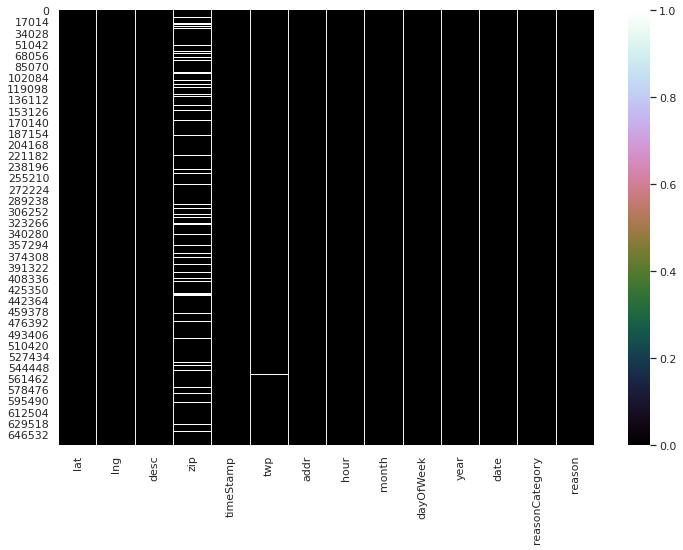

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isna(),cmap='cubehelix')
plt.show()

We can see that the column 'zip' has most number of missing value. We can create a function to fill in the missing value but it is not needed. Since we already have the address in a seperate column.

If in future we need to use 'zip' column for analysis we can simply drop missing rows. (or) we can simply drop the 'zip' column itself.
In grand scale approximately 8% of data is only missing. 

### Saving the cleaned dataset

In [29]:
data.to_csv('cleaned_911.csv')

### Visualization

####**Number of 911 Calls based on the reasons**

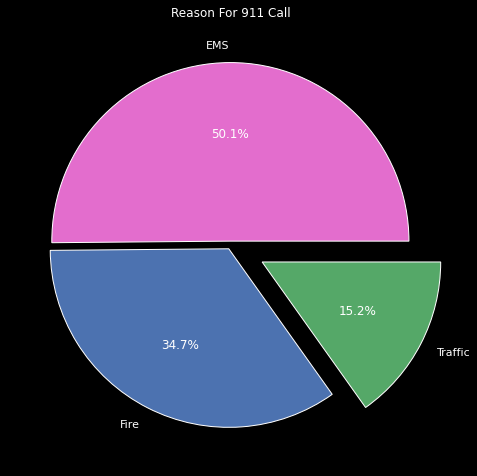

In [36]:
plt.figure(figsize=(8,10))


myColors = ["#e36dcd", "b", "g"] 
myExplode = [0.025,0.02,0.2]
plt.pie(data['reasonCategory'].value_counts(),labels=data['reasonCategory'].unique(),autopct='%1.1f%%',colors=myColors,explode = myExplode)
plt.title("Reason For 911 Call")
plt.show()

**Inference**


Previous we say the majority of the 911 calls are realted to vehicles but this pie chart show that 50.1% of calls are made for Emergency medical services. 

Possible reason for this could be that, people who meat in a road accident would call 911 and request for the medical assistent first rather than the assistence with their vehicles. 





#### **Number of 911 calls made on each day of the week**

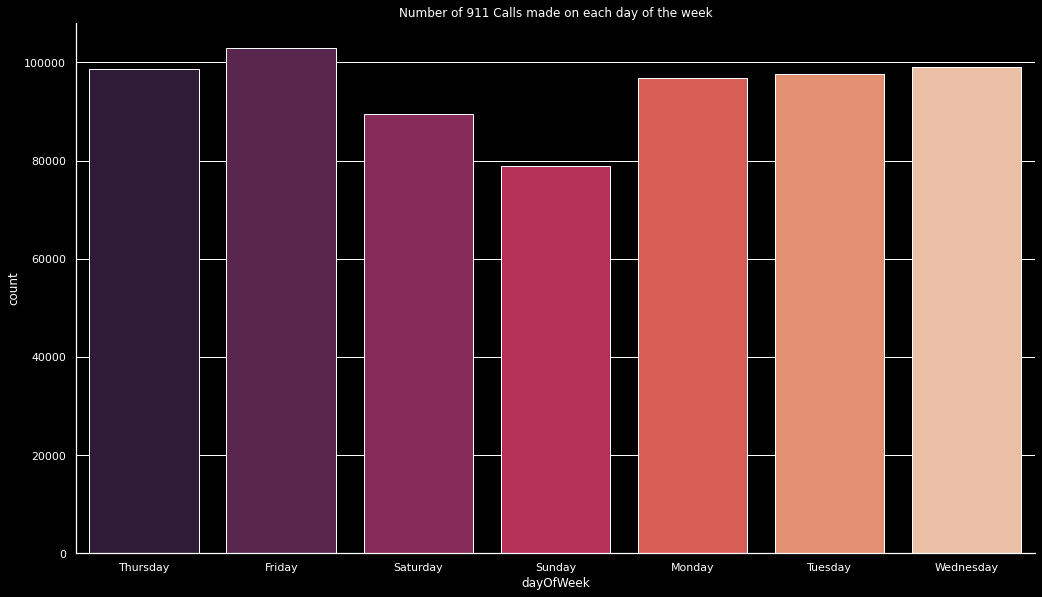

In [37]:
sns.catplot(x='dayOfWeek',data=data,palette='rocket',kind='count',height=8, aspect=1.8)
plt.title('Number of 911 Calls made on each day of the week')
plt.show()

**Inference**

Compared to other days of the week we see very less number of calls on sunday.
The possible reason for this could be that, our dataset contains majority of the vehicle related call and most people may stay in home and take rest of sunday.




#### **Number of 911 calls made since 2015 (Year Wise)**

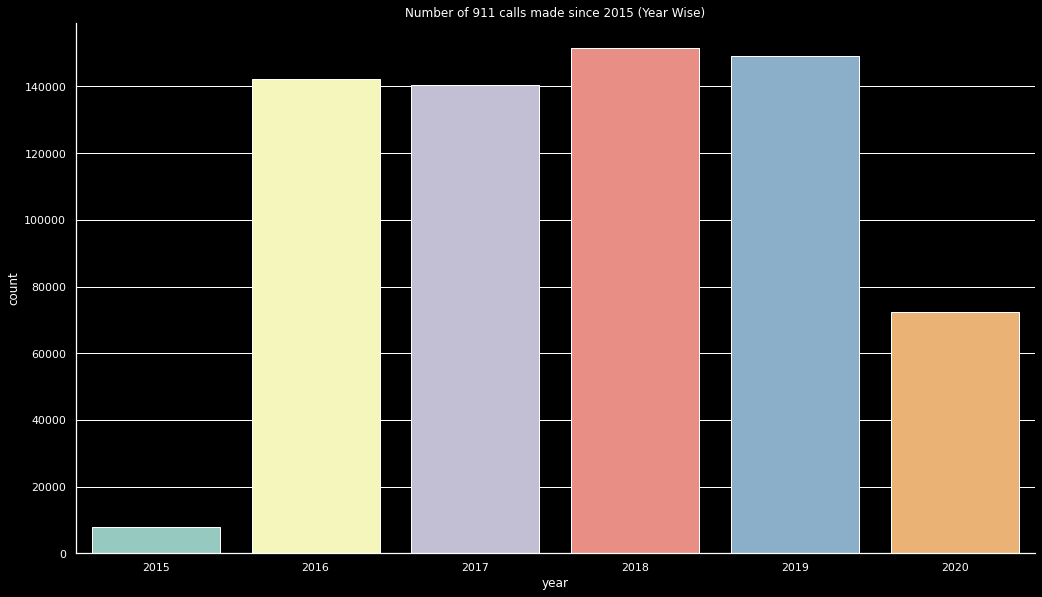

In [38]:
sns.catplot(x='year',data=data,kind='count',height=8, aspect=1.8)
plt.title('Number of 911 calls made since 2015 (Year Wise)')
plt.show()

In [39]:
data['timeStamp'].max()

Timestamp('2020-07-29 15:54:08')

In [40]:
data['timeStamp'].min()

Timestamp('2015-12-10 14:39:21')

**Inference**

We have very less number of call in the years 2015 and 2020.
The reason is, this dataset contains only the data recorded from the date 
2015-12-10 to 2020-07-29.

So now it makes sense.

#### **Number of 911 calls made on each month**

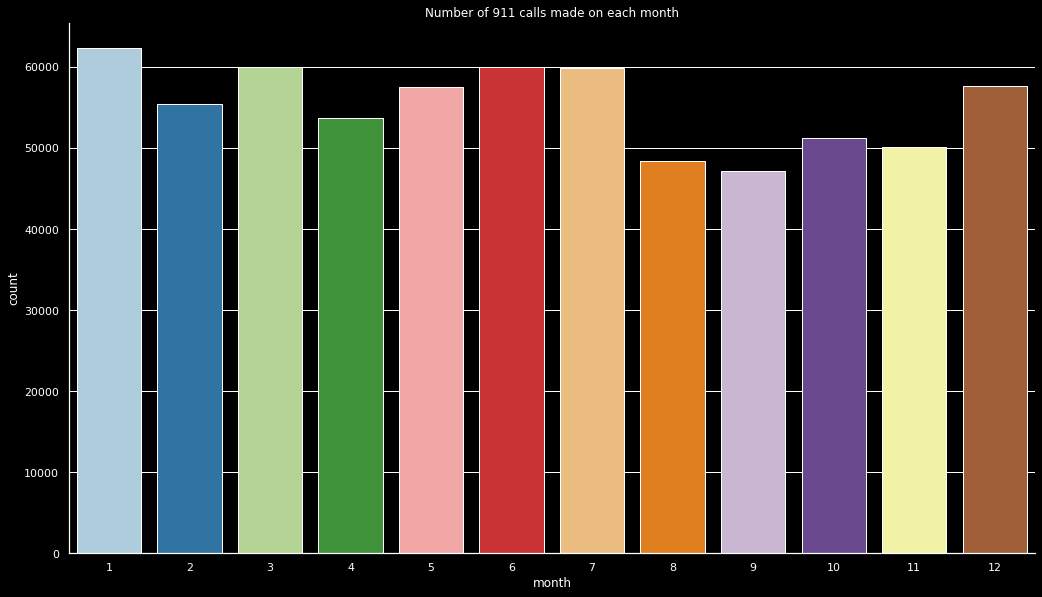

In [41]:
sns.catplot(x='month',data=data,kind='count',height=8, aspect=1.8,palette='Paired')
plt.title('Number of 911 calls made on each month')
plt.show()

**Inference**

This bar graph shows that there are less number of calls made in the months 8,9,10 and 11. It is because of the same reason, we dont have the data for the year 2020 from the month 7. And the reason that we have more calls on the 12th month is because, on the year 2015 we only have the data for the 12th month.

#### **Number of calls made on each day since 2015**

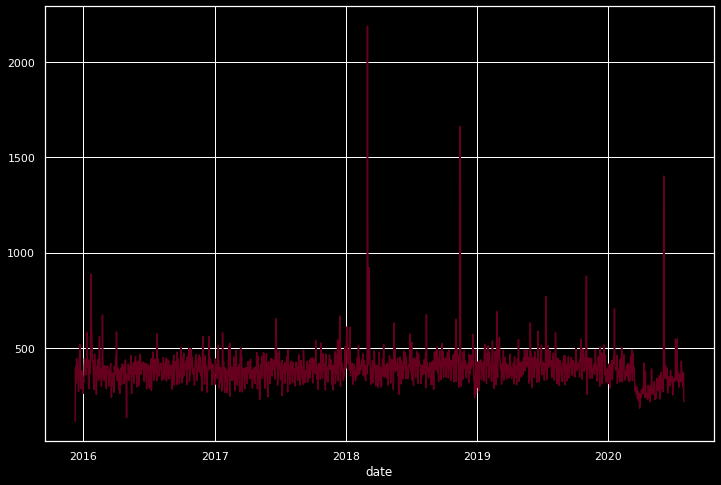

In [45]:
plt.figure(figsize=(12,8))

data.groupby('date').count()['twp'].plot(kind='line',colormap='RdBu')

We can see a clear spike on certain days. Lets find out those dates.

In [43]:
data.groupby('date').count().sort_values(by='twp',ascending=False)

,lat,lng,desc,zip,timeStamp,twp,addr,hour,month,dayOfWeek,year,reasonCategory,reason
date,,,,,,,,,,,,,
2018-03-02,2187,2187,2187,1986,2187,2187,2187,2187,2187,2187,2187,2187,2187
2018-11-15,1662,1662,1662,1458,1662,1662,1662,1662,1662,1662,1662,1662,1662
2020-06-03,1401,1401,1401,1283,1401,1401,1401,1401,1401,1401,1401,1401,1401
2018-03-07,920,920,920,824,920,920,920,920,920,920,920,920,920
2018-03-03,917,917,917,836,917,917,917,917,917,917,917,917,917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-29,217,217,217,184,217,217,217,217,217,217,217,217,217
2020-03-29,204,204,204,187,204,203,204,204,204,204,204,204,204
2020-03-28,184,184,184,155,184,184,184,184,184,184,184,184,184


2018-03-02, 2018-11-15 and 2020-06-03

On the above 3 dates we can see an unusual amount of calls made. So i went to google and checked whether any natural calamities has occured on these dates.

And it turns out that, in pennsylvania on these dates there has been huge winter stroms. Thus the spike in number of calls

#### **Number of calls made on each hour of a day**

In [46]:
data['hour'].value_counts().sort_values(ascending=False)

17    44119
16    42797
15    42263
14    40346
12    40097
13    39797
11    38076
18    37322
10    36577
9     35477
8     33380
19    32442
20    28079
7     26971
21    24659
22    20313
6     17219
23    16892
0     13863
1     11751
5     11676
2     10653
3      9488
4      9265
Name: hour, dtype: int64

In [47]:
s = pd.DataFrame(data['hour'].value_counts().sort_values(ascending=False))

In [48]:
s['first'] = s.index

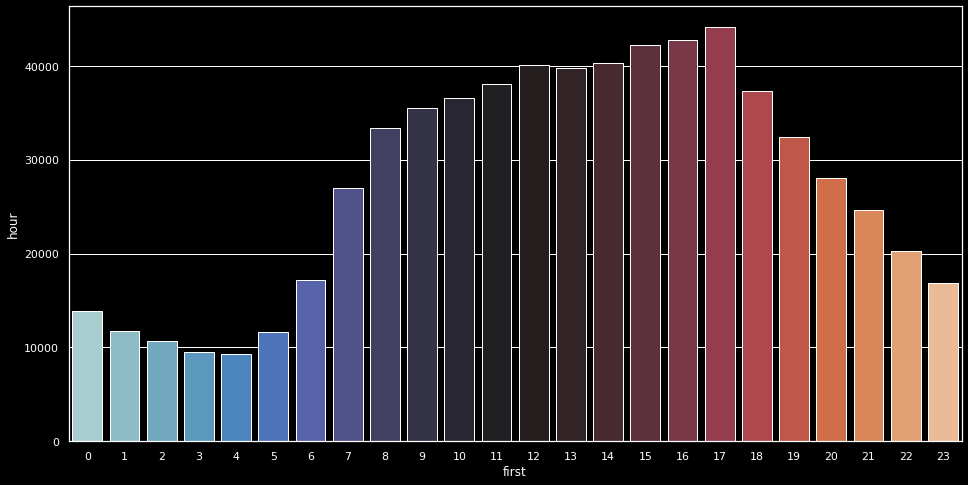

In [56]:
plt.figure(figsize=(16,8))
sns.barplot(x=s['first'],y=s['hour'],palette='icefire')